In [2]:
import pandas as pd

def get_province(x):
    temp = x.split(' ')[0]
    if len(temp) != 4:
        return temp[:2]
    else:
        return temp[0] + temp[2]


def job_preprocessing(path):
    job_raw = pd.read_excel(path, skiprows=1)
    job_data = job_raw[job_raw['산업별'] == '전산업']
    job_data = job_data[['지역별', '전체종사자']]
    job_data.columns = ['지역명',  '고용자수']
    
    job_data['시도'] = job_data['지역명'].apply(get_province)
    job_data['구군'] = job_data['지역명'].apply(lambda x: x.split(' ')[1])
    
    return job_data

def house_number_preprocessing(path):
    house_raw = pd.read_excel(path)
    house_raw.columns = ['시도', '구군', '세대수']

    big_col = []
    for num, temp in enumerate(house_raw['시도']):
        if pd.isna(temp) :
            big_col.append(big_col[num-1])
        else:
            big_col.append(temp)
    house_raw['시도'] = big_col
    
    house_raw['시도'] = house_raw['시도'].apply(get_province)
    house_data = house_raw[house_raw['구군'] != '소계']
    
    return house_data

In [3]:
job_path = f'data/과제1_지역고용통계_20190706075534.xlsx'

In [4]:
job_df = job_preprocessing(job_path)

In [5]:
house_path = f'data/과제1_행정구역_시군구_별_주민등록세대수_20190706074416.xlsx'

In [6]:
house_df = house_number_preprocessing(house_path)
house_df

,시도,구군,세대수
2,서울,종로구,73562
3,서울,중구,60520
4,서울,용산구,107979
5,서울,성동구,133233
6,서울,광진구,161143
...,...,...,...
273,경남,함양군,19908
274,경남,거창군,28439
275,경남,합천군,24190
277,제주,제주시,198869


In [7]:
job_sido = job_df.groupby('시도').sum()
job_sido = job_sido.sort_values(by='고용자수', ascending=False)
job_df

,지역명,고용자수,시도,구군
0,서울특별시 종로구,232311,서울,종로구
6,서울특별시 중구,344038,서울,중구
12,서울특별시 용산구,129597,서울,용산구
18,서울특별시 성동구,155558,서울,성동구
24,서울특별시 광진구,101377,서울,광진구
...,...,...,...,...
1344,경상남도 함양군,9275,경남,함양군
1350,경상남도 거창군,15247,경남,거창군
1356,경상남도 합천군,9185,경남,합천군
1362,제주도 제주시,157516,제주,제주시


# Q) 과제2_평균매매가격_아파트.xlsx 파일을 업로드 하고, house_price_preprocessing을 사용해서 데이터를 전처리 하라.

In [8]:
def house_price_preprocessing(path):
    row_price = pd.read_excel(path, skiprows=10)
    
    big_col = []
    for num, temp in enumerate(row_price['지 역']):
        if pd.isna(temp) :
            big_col.append(big_col[num-1])
        else:
            big_col.append(temp)


    small_col = []
    for num in range(len(row_price)):
        temp_list = list(row_price[['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']].iloc[num])
        for temp in temp_list[3::-1]:
            if not pd.isna(temp):
                small_col.append(temp)
                break

    row_price.index = [big_col, small_col]
    
    transposed_price = row_price.drop(['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1).T
    
    time_index = []
    for time in transposed_price.index:
        temp = time.split(' ')
        time_index.append(temp[0][:-1]+'.'+temp[1][:-1])

    transposed_price.index = pd.to_datetime(time_index)
    
    return transposed_price

In [9]:
price_path = f'data/과제2_평균매매가격_아파트.xlsx'
price_df = house_price_preprocessing(price_path)

# Q) 데이터 분석 및 이미지 출력을 위한 설정을 진행하세요.

In [10]:
import pandas as pd

In [11]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

In [13]:
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [14]:
# 3. 한글폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# 맥OS인 경우 위 두 줄을 입력하지 말고 아래 코드를 입력하세요
#rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [15]:
# 4. 해상도 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# Q) 시도 단위의 고용자수를 막대 그래프로 보기 

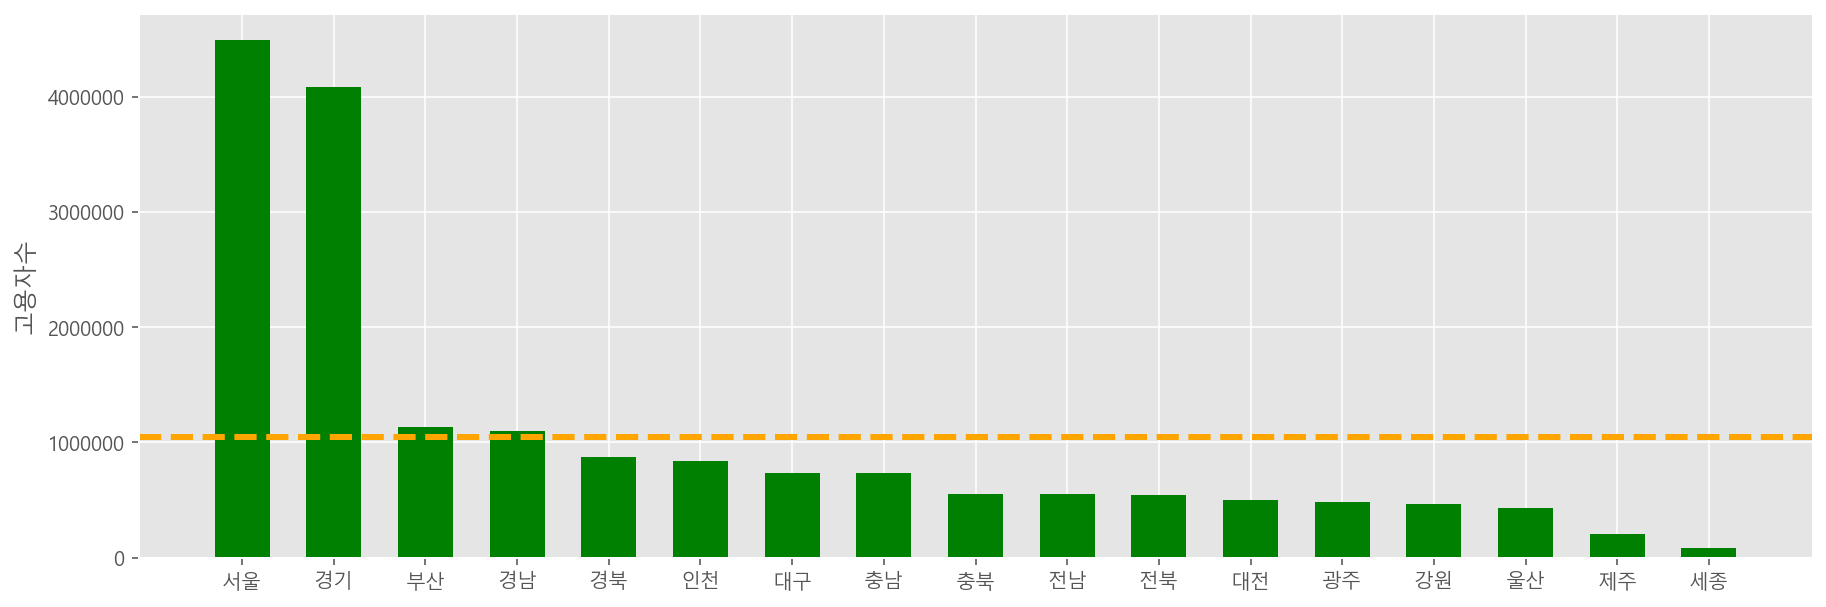

In [60]:
import numpy as np
plt.figure(figsize=(15,5))

x=job_sido.index
y=job_sido['고용자수']
plt.bar(x,y,width=0.6, color='green')
plt.ylabel('고용자수')

m=y.mean()
plt.axhline(m,ls='--',color='orange',lw=3)
plt.show()

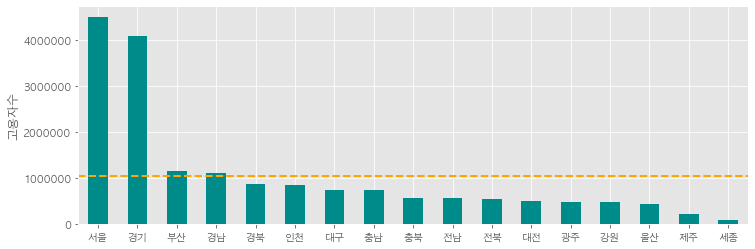

# Q) 시도 단위 세대구 대비 고용비율 막대 그래프로 보기
 * 세대 몇명 중 몇명이 일하는지 그 비율

In [32]:
house_sido = house_df.groupby('시도').sum()
house_sido

,세대수
시도,
강원,699946
경기,7309290
경남,1828292
경북,1407741
광주,593739
대구,1008158
대전,615642
부산,1468069
서울,4224387


In [33]:
job_sido.index

Index(['서울', '경기', '부산', '경남', '경북', '인천', '대구', '충남', '충북', '전남', '전북', '대전',
       '광주', '강원', '울산', '제주', '세종'],
      dtype='object', name='시도')

In [34]:
sido_list = []
for i in job_sido.index:
    sido_list.append(house_sido.loc[i]['세대수'])
    
job_sido['세대수'] = sido_list
job_sido['고용 비율(%)']=(job_sido['고용자수']/job_sido['세대수'])*100
job_total=job_sido.sort_values(by='고용 비율(%)',ascending=False)
job_total

,고용자수,세대수,고용 비율(%)
시도,,,
서울,4495058,4224387,106.407344
울산,431564,458894,94.044376
광주,483468,593739,81.427698
대전,495860,615642,80.543563
세종,85797,110573,77.593083
부산,1138105,1468069,77.523945
제주,204376,278955,73.264864
대구,735890,1008158,72.993519
인천,842205,1191418,70.689296


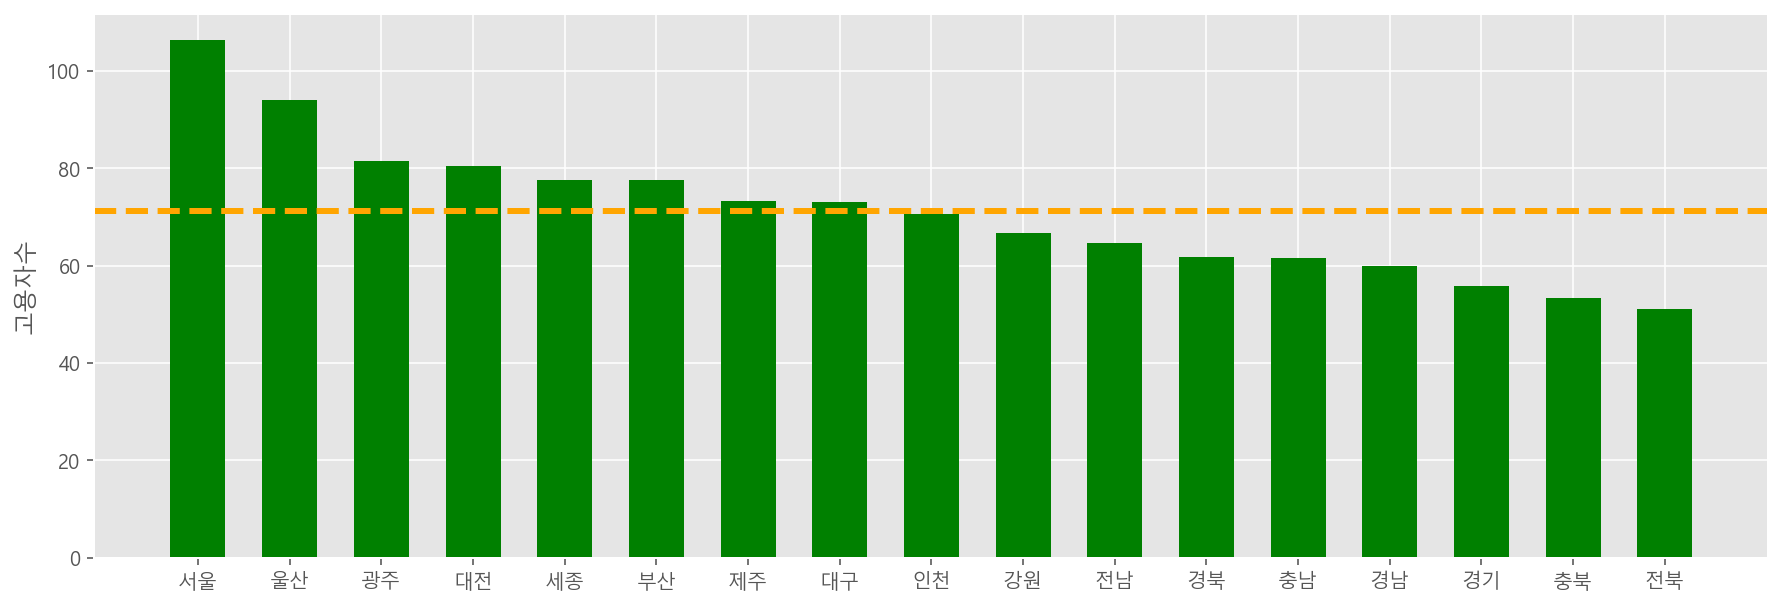

In [58]:
plt.figure(figsize=(15,5))

x=job_total.index
y=job_total['고용 비율(%)']
plt.bar(x,y,width=0.6, color='green')
plt.ylabel('고용자수')

m=y.mean()
plt.axhline(m,ls='--',color='orange',lw=3)
plt.show()

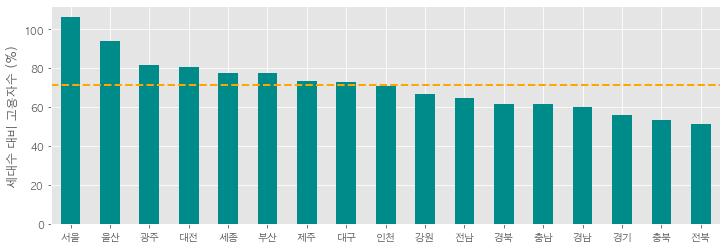

# 고용자수, 세대수, 평균 아파트 매매가격 scatter 그래프로 나타내기
* 아래 예제는 scatter 예제 입니다. 아래 코드를 잘 분석해서 아래 문제를 해결해보세요.

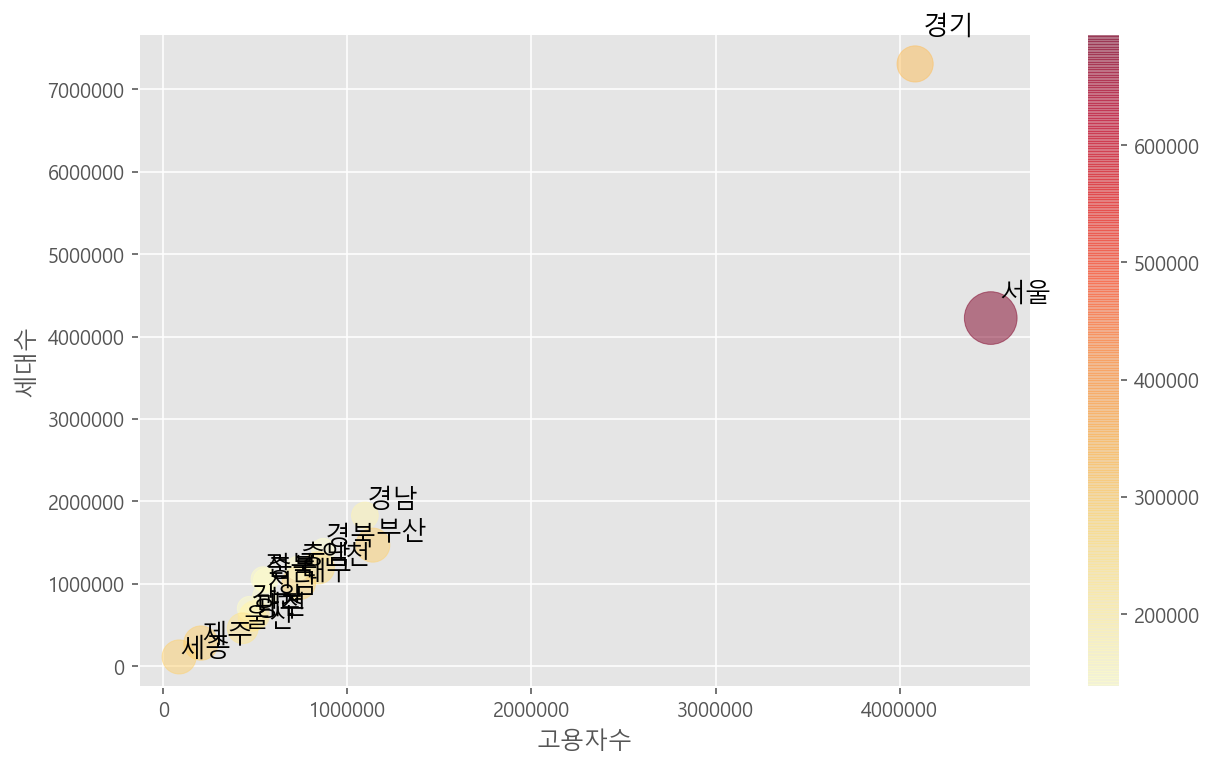

In [36]:
sido_list = []
for i in job_sido.index:
    sido_list.append(price_df.loc['2018-6-1'][i][i])
      
job_sido['평균매매가격'] = sido_list

plt.figure(figsize=(10, 6))
plt.scatter(job_sido['고용자수'], job_sido['세대수'], c=job_sido['평균매매가격'], s=job_sido['평균매매가격']*0.001, cmap="YlOrRd", alpha=0.5 )
plt.xlabel('고용자수')
plt.ylabel('세대수')
for name in job_sido.index:
    plt.text(job_sido['고용자수'][name]*1.01, job_sido['세대수'][name]*1.05, name, fontsize=13)

plt.colorbar()
plt.show()

# Q) 세대수 대비 고용비율, 세대수, 평균 아파트 매매가격 scatter 그래프로 나타내기

In [37]:
sido_list = []
for i in job_total.index:
    sido_list.append(price_df.loc['2018-6-1'][i][i])
    
job_total['평균매매가격'] = sido_list
job_total

,고용자수,세대수,고용 비율(%),평균매매가격
시도,,,,
서울,4495058,4224387,106.407344,694739
울산,431564,458894,94.044376,236946
광주,483468,593739,81.427698,201933
대전,495860,615642,80.543563,217556
세종,85797,110573,77.593083,290533
부산,1138105,1468069,77.523945,290841
제주,204376,278955,73.264864,294989
대구,735890,1008158,72.993519,282575
인천,842205,1191418,70.689296,259834


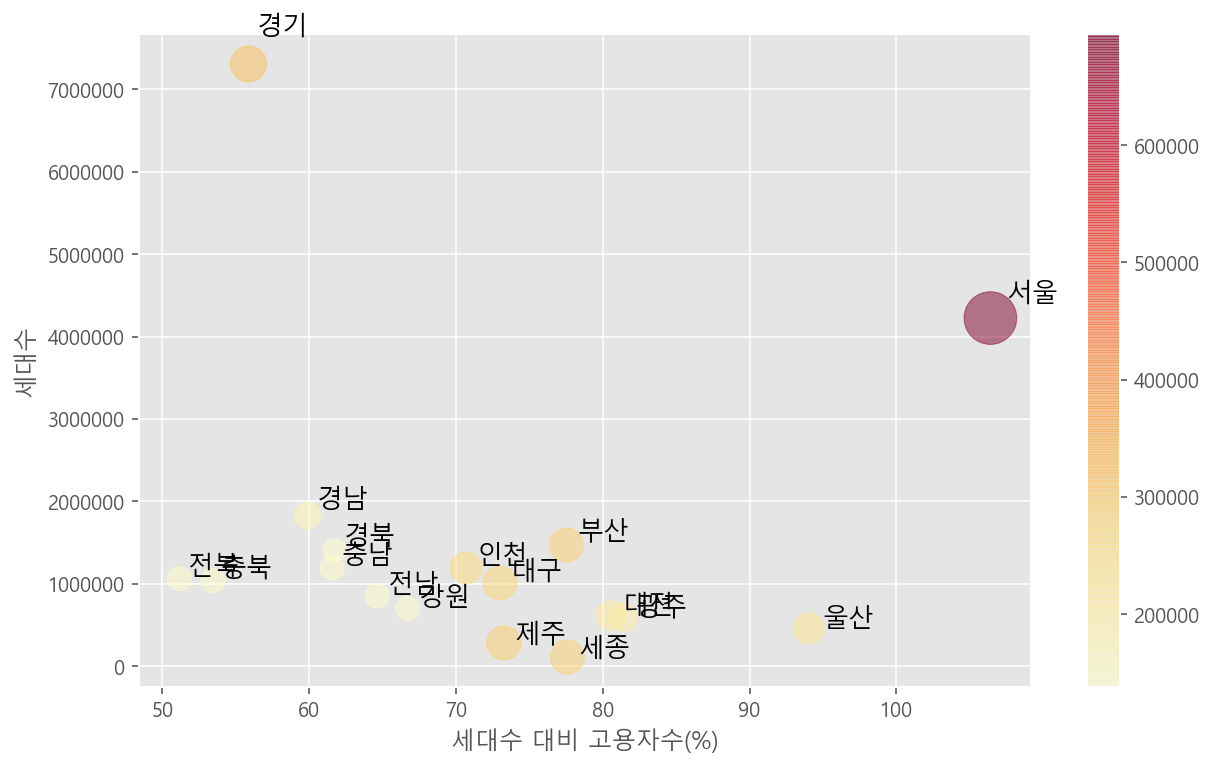

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(job_total['고용 비율(%)'], job_total['세대수'], c=job_total['평균매매가격'], s=job_total['평균매매가격']*0.001, cmap="YlOrRd", alpha=0.5 )
plt.xlabel('세대수 대비 고용자수(%)')
plt.ylabel('세대수')
for name in job_sido.index:
    plt.text(job_total['고용 비율(%)'][name]*1.01, job_total['세대수'][name]*1.05, name, fontsize=13)

plt.colorbar()
plt.show()

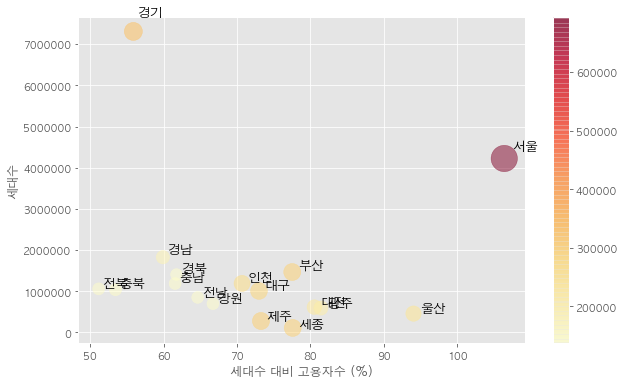

# Q) 부산시의 구군별 고용자수

In [39]:
job_busan=job_df[job_df['시도']=='부산']
job_busan=job_busan.sort_values(by='고용자수',ascending=False)
job_busan

,지역명,고용자수,시도,구군
174,부산광역시 부산진구,135400,부산,부산진구
198,부산광역시 해운대구,106604,부산,해운대구
216,부산광역시 강서구,100564,부산,강서구
234,부산광역시 사상구,97357,부산,사상구
204,부산광역시 사하구,86681,부산,사하구
222,부산광역시 연제구,77508,부산,연제구
210,부산광역시 금정구,75689,부산,금정구
180,부산광역시 동래구,67158,부산,동래구
186,부산광역시 남구,65959,부산,남구
162,부산광역시 동구,63121,부산,동구


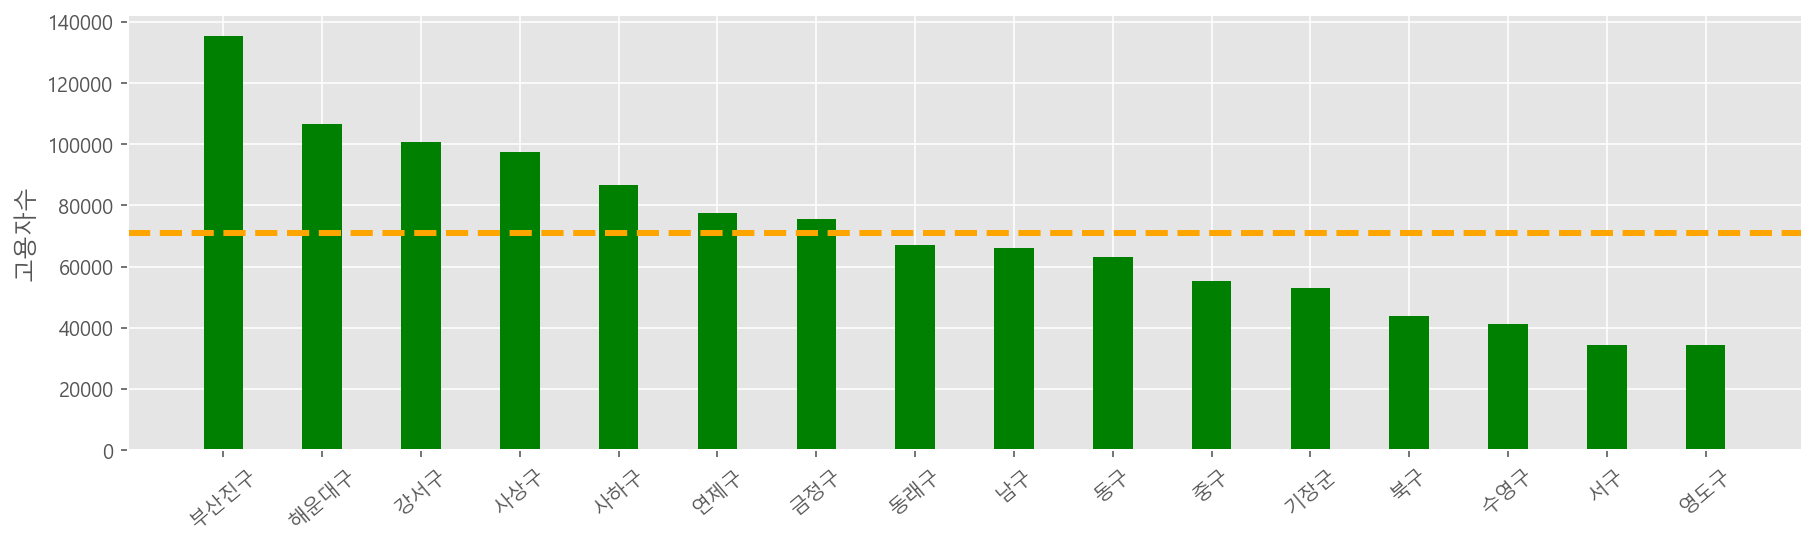

In [56]:
plt.figure(figsize=(15,4))
x=job_busan['구군']
y=job_busan['고용자수']
plt.xticks(rotation=40)
plt.ylabel("고용자수")
plt.bar(x,y,width=0.4, color='green')

m=y.mean()
plt.axhline(m,ls='--',color='orange',lw=3)
plt.show()

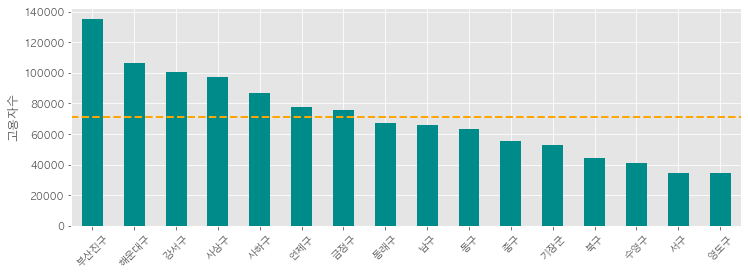

# Q) 부산시의 구군별 고용비율(세대수 대비 고용자수)

In [44]:
house_busan=house_df[house_df['시도']=='부산']
house_busan1=house_busan.set_index('구군')
house_busan1.drop(['시도'],axis=1)

,세대수
구군,
중구,23265
서구,51900
동구,43443
영도구,55710
부산진구,166392
동래구,108560
남구,113755
북구,120227
해운대구,165184


In [45]:
job_busan1=job_busan.set_index('구군')
job_busan1

,지역명,고용자수,시도
구군,,,
부산진구,부산광역시 부산진구,135400,부산
해운대구,부산광역시 해운대구,106604,부산
강서구,부산광역시 강서구,100564,부산
사상구,부산광역시 사상구,97357,부산
사하구,부산광역시 사하구,86681,부산
연제구,부산광역시 연제구,77508,부산
금정구,부산광역시 금정구,75689,부산
동래구,부산광역시 동래구,67158,부산
남구,부산광역시 남구,65959,부산


In [52]:
gugun_list = []
for i in job_busan1.index:
    gugun_list.append(house_busan1.loc[i]['세대수'])
    
job_busan1['세대수'] = gugun_list
job_busan1

,지역명,고용자수,시도,세대수
구군,,,,
부산진구,부산광역시 부산진구,135400,부산,166392
해운대구,부산광역시 해운대구,106604,부산,165184
강서구,부산광역시 강서구,100564,부산,47892
사상구,부산광역시 사상구,97357,부산,97146
사하구,부산광역시 사하구,86681,부산,137872
연제구,부산광역시 연제구,77508,부산,86013
금정구,부산광역시 금정구,75689,부산,104870
동래구,부산광역시 동래구,67158,부산,108560
남구,부산광역시 남구,65959,부산,113755


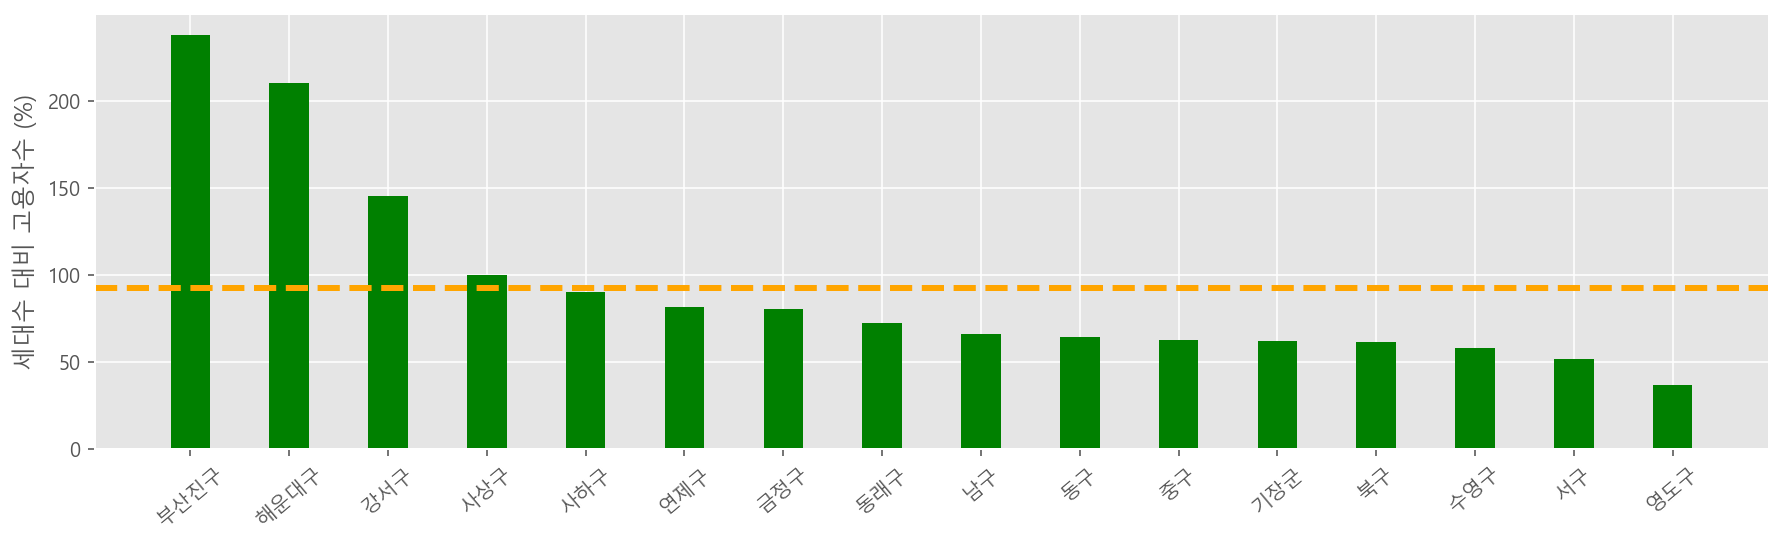

In [55]:
x=job_busan1.index
y=(job_busan1['고용자수']/job_busan1['세대수'])*100
y1=y.sort_values(ascending=False)
plt.figure(figsize=(15,4))
plt.xticks(rotation=40)
plt.ylabel("세대수 대비 고용자수 (%)")
plt.bar(x,y1,width=0.4, color='green')

m=y.mean()
plt.axhline(m,ls='--',color='orange',lw=3)
plt.show()

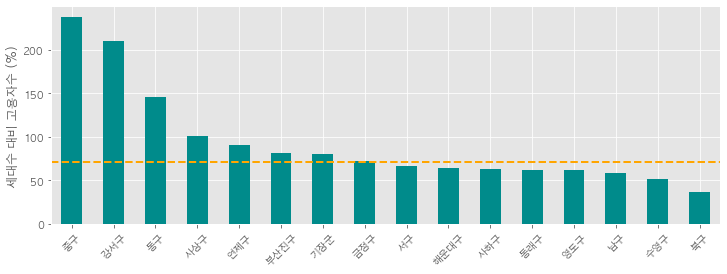

# Q) 부산시의 고용자수, 세대수, 평균 아파트 매매가로 scatter 그래프 그리기

In [187]:
gugun_list = []
for i in job_busan1.index:
    gugun_list.append(price_df.loc['2018-6-1']['부산'][i])
    
job_busan1['평균매매가격'] = gugun_list
job_busan1

,지역명,고용자수,시도,세대수,평균매매가격
구군,,,,,
부산진구,부산광역시 부산진구,135400,부산,166392,256955
해운대구,부산광역시 해운대구,106604,부산,165184,385081
강서구,부산광역시 강서구,100564,부산,47892,359232
사상구,부산광역시 사상구,97357,부산,97146,199006
사하구,부산광역시 사하구,86681,부산,137872,201779
연제구,부산광역시 연제구,77508,부산,86013,345188
금정구,부산광역시 금정구,75689,부산,104870,306175
동래구,부산광역시 동래구,67158,부산,108560,360443
남구,부산광역시 남구,65959,부산,113755,298089


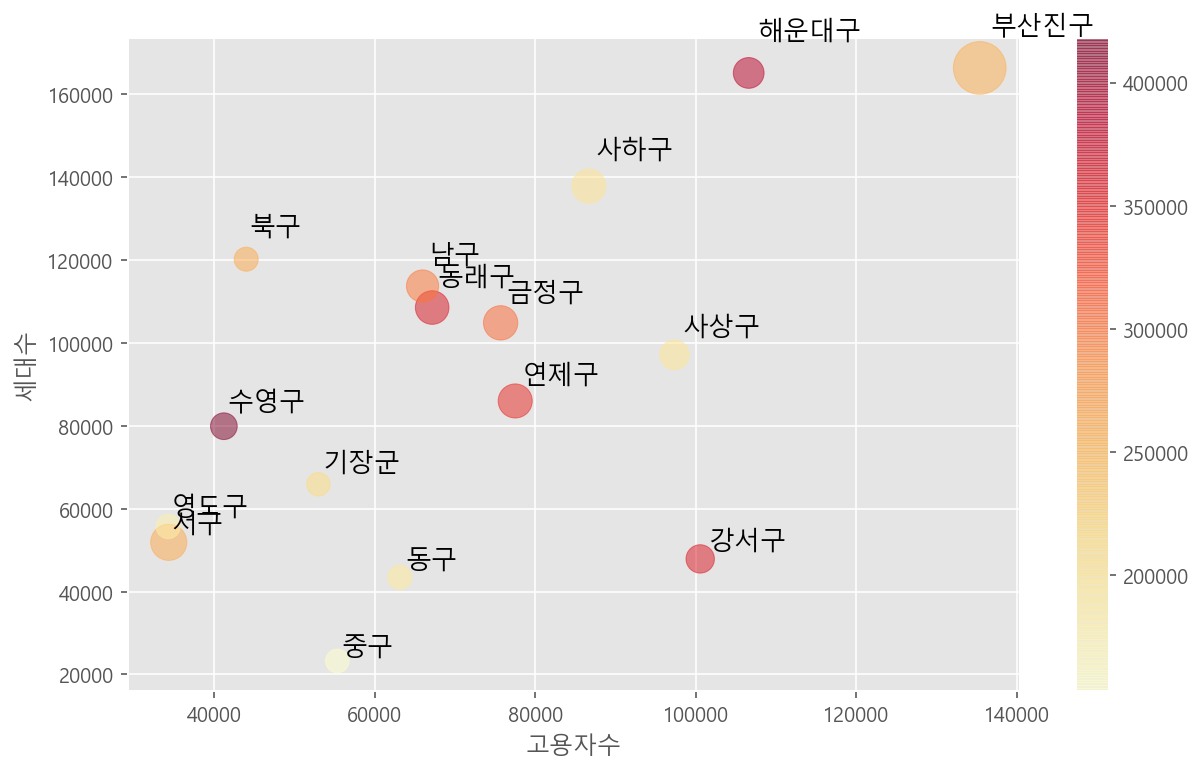

In [189]:
plt.figure(figsize=(10, 6))
plt.scatter(job_busan1['고용자수'], job_busan1['세대수'], c=job_busan1['평균매매가격'], s=job_total['평균매매가격']*0.001, cmap="YlOrRd", alpha=0.5 )
plt.xlabel('고용자수')
plt.ylabel('세대수')
for name in job_busan1.index:
    plt.text(job_busan1['고용자수'][name]*1.01, job_busan1['세대수'][name]*1.05, name, fontsize=13)

plt.colorbar()
plt.show()

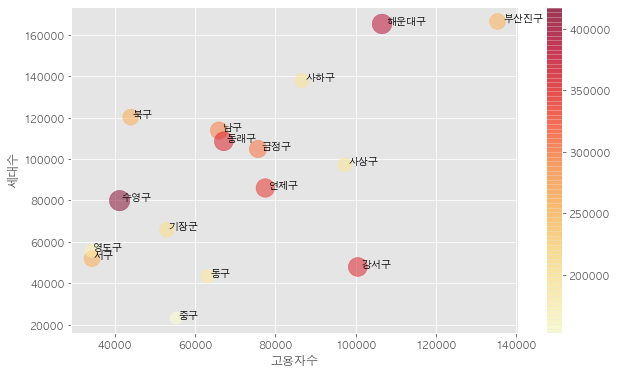

# Q) 부산시의 고용비율, 세대수, 평균 아파트 매매가로 scatter 그래프 그리기

In [193]:
job_busan1['고용 비율(%)']=(job_busan1['고용자수']/job_busan1['세대수'])*100

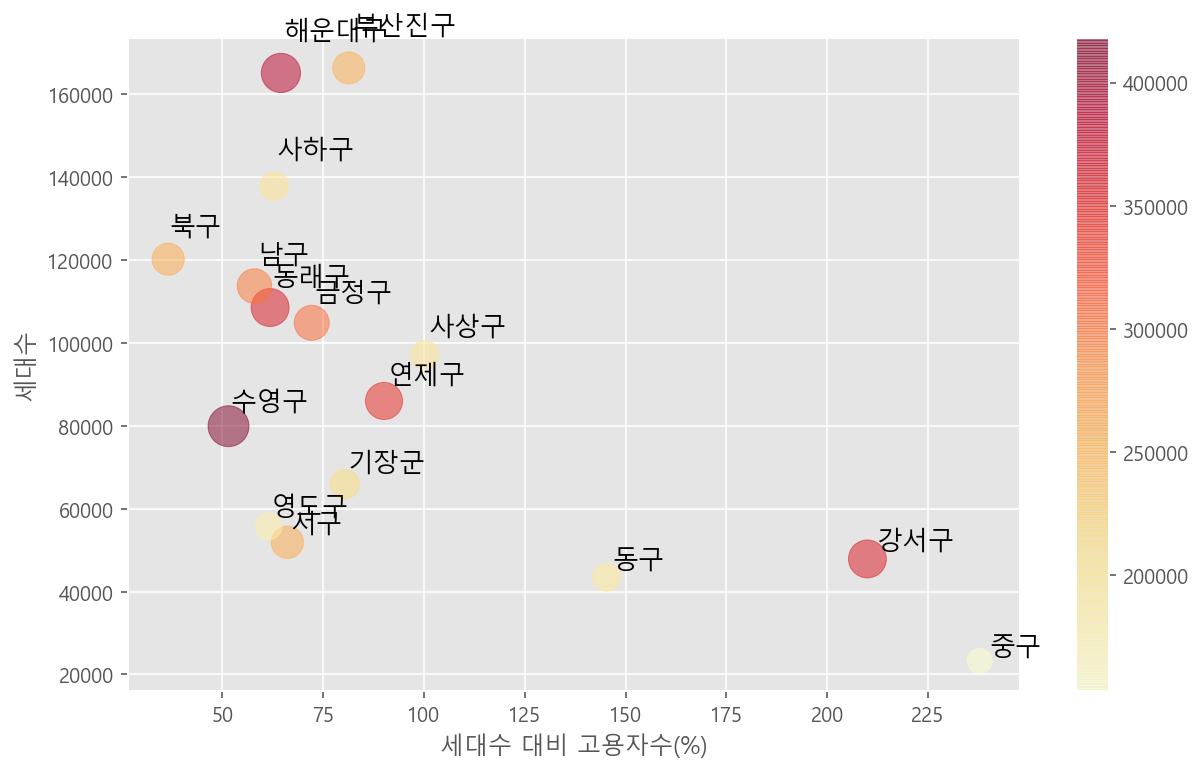

In [194]:
plt.figure(figsize=(10, 6))
plt.scatter(job_busan1['고용 비율(%)'], job_busan1['세대수'], c=job_busan1['평균매매가격'], s=job_busan1['평균매매가격']*0.001, cmap="YlOrRd", alpha=0.5 )
plt.xlabel('세대수 대비 고용자수(%)')
plt.ylabel('세대수')
for name in job_busan1.index:
    plt.text(job_busan1['고용 비율(%)'][name]*1.01, job_busan1['세대수'][name]*1.05, name, fontsize=13)

plt.colorbar()
plt.show()

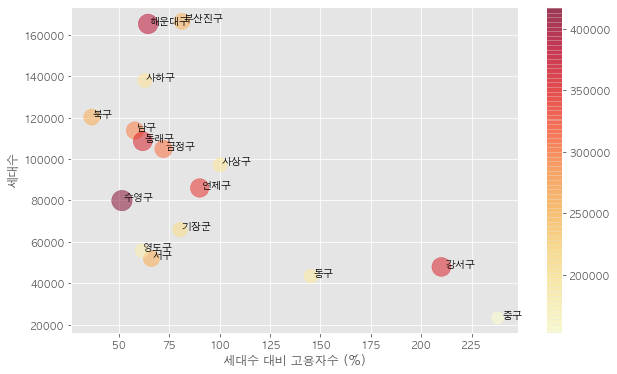